In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree

In [97]:
df = pd.read_csv('stolen_base_features.csv')
df.head()

,Unnamed: 0,game_pk,at_bat_number,runner_id,pitcher_id,catcher_id,successful_sb,runner_sprint_speed,pitch_tempo,sb_att_rate,lead_dist_gained_opp,lead_dist_gained_att,pop_time,exchange_time,arm_strength,cs_aa_per_throw
0,0,717800,20,655316,676664,542208,1,28.0,17.433,0.023847,1.847397,9.773667,1.988417,0.644583,78.32061,0.175065
1,1,717660,30,608070,676664,542208,0,27.8,17.433,0.023847,1.847397,9.773667,1.988417,0.644583,78.32061,0.175065
2,2,717660,38,665926,676664,542208,1,29.2,17.433,0.023847,1.847397,9.773667,1.988417,0.644583,78.32061,0.175065
3,3,718200,22,669352,686610,542208,1,30.4,15.792,0.014737,1.715638,14.375143,1.988417,0.644583,78.32061,0.175065
4,4,718565,43,516782,660261,542208,1,27.1,17.923,0.012097,3.617790,8.765000,1.988417,0.644583,78.32061,0.175065


In [98]:
X = df[['runner_sprint_speed', 'lead_dist_gained_opp', 'lead_dist_gained_att', 'cs_aa_per_throw']]
y = df['successful_sb']

rs = RandomOverSampler()
X_resampled, y_resampled = rs.fit_resample(X, y)
print(f'Oversampling: X_resampled={X_resampled},\ny_resampled={y_resampled}')
# rs = RandomUnderSampler()
# X_resampled, y_resampled = rs.fit_resample(X, y)
# print(f'Undersampling: X_resampled={X_resampled},\ny_resampled={y_resampled}')

X_train, X_tmp, y_train, y_tmp = train_test_split(X_resampled, y_resampled, test_size=.2,
                                                  random_state=0, stratify=y_resampled)

X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0, stratify=y_tmp)

Oversampling: X_resampled=      runner_sprint_speed  lead_dist_gained_opp  lead_dist_gained_att  \
0                    28.0              1.847397              9.773667   
1                    27.8              1.847397              9.773667   
2                    29.2              1.847397              9.773667   
3                    30.4              1.715638             14.375143   
4                    27.1              3.617790              8.765000   
...                   ...                   ...                   ...   
4517                 25.6              4.170352             10.776385   
4518                 28.6              3.809917              8.665444   
4519                 26.9              4.215044              9.815800   
4520                 28.9              3.499614              7.511667   
4521                 28.6              2.322673             11.207333   

      cs_aa_per_throw  
0            0.175065  
1            0.175065  
2            0.175065  
3

In [92]:
# model = DecisionTreeRegressor()
# model.fit(X, y)
# pi = permutation_importance(estimator=model, X=X, y=y, random_state=0)
# data = pd.DataFrame(X.columns, pi.importances_mean)
# data



In [99]:
classifiers = [svm.SVC(), linear_model.LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]
parameters = [
    {'kernel': ('rbf', 'linear'), 'C': (.01, 1, 100)}, 
    {'max_iter': [5000], 'C': (.01, 1, 100)}, 
    {'criterion': ['entropy'], 'max_depth': (1,3,5,7)}, 
    {'metric': ['euclidean'], 'n_neighbors': (1,2,3,4)},
    {'n_estimators': [10, 100], 'max_depth': [1, 100]}
    ]

bc_index = -1
bc_accuracy = -np.Inf
bc_params = None

for i in range(0, 5):
    clf = GridSearchCV(classifiers[i], parameters[i])
    clf.fit(X_train, y_train)
    score = clf.score(X_valid, y_valid)
    param = clf.best_params_
    if score > bc_accuracy:
        bc_params = param
        bc_index = i
        bc_accuracy = score

print(f'The best classifier is {classifiers[bc_index]} with hyperparamater ' +
      f'settings {bc_params} with an accuracy of {bc_accuracy:.3}')


The best classifier is RandomForestClassifier() with hyperparamater settings {'max_depth': 100, 'n_estimators': 100} with an accuracy of 0.892


In [101]:
model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1)
model.fit(X_train, y_train)

print(model.score(X_valid, y_valid))
model.predict(X_valid)

0.8672566371681416


array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,

In [102]:
model = RandomForestClassifier(max_depth = 100, n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)

print(model.score(X_valid, y_valid))
model.predict(X_valid)

0.8871681415929203


array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,

[Text(0.5560474341413107, 0.9814814814814815, 'cs_aa_per_throw <= 0.024\ngini = 0.5\nsamples = 2286\nvalue = [1822, 1795]\nclass = 0'),
 Text(0.20322623067578707, 0.9444444444444444, 'lead_dist_gained_att <= 10.103\ngini = 0.483\nsamples = 1340\nvalue = [868, 1256]\nclass = 1'),
 Text(0.0856194594281913, 0.9074074074074074, 'cs_aa_per_throw <= -0.047\ngini = 0.494\nsamples = 463\nvalue = [406, 324]\nclass = 0'),
 Text(0.020130442956514193, 0.8703703703703703, 'lead_dist_gained_att <= 7.206\ngini = 0.494\nsamples = 219\nvalue = [158, 196]\nclass = 1'),
 Text(0.0037021504287842195, 0.8333333333333334, 'lead_dist_gained_opp <= 2.171\ngini = 0.346\nsamples = 32\nvalue = [42, 12]\nclass = 0'),
 Text(0.0018510752143921097, 0.7962962962962963, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]\nclass = 1'),
 Text(0.005553225643176329, 0.7962962962962963, 'lead_dist_gained_att <= 5.262\ngini = 0.291\nsamples = 30\nvalue = [42, 9]\nclass = 0'),
 Text(0.0037021504287842195, 0.7592592592592593, 'gini = 0.0

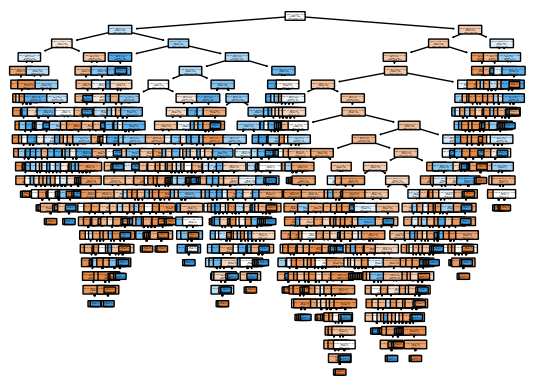

In [103]:
plot_tree(model.estimators_[0], feature_names = X.columns, class_names = ['0','1'], filled = True, rounded = True)